# <div style="text-align:center; border-radius:15px 15px; padding:7px; color:#E44F1B; margin:0; font-size:150%; font-family:Pacifico; background-color:#1BB0E4; overflow:hidden;"><b> Ahmad Gaitani Code ✨ </b> </div>

![Guns](https://raw.githubusercontent.com/Ahmadgatany/Guns-Object-Detection-Code/refs/heads/main/Guns%20object%20detection.png)



# <div style="text-align:center; border-radius:15px 15px; padding:10px; color:#E44F1B; margin:0; font-size:120%; font-family:Pacifico; background-color:#1BB0E4; overflow:hidden;"><b> Step 1: Install and Import Libraries </b> </div>

In [1]:
pip install ultralytics 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.7/881.7 kB 22.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import glob
import yaml
import shutil
import random
from ultralytics import YOLO
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# <div style="text-align:center; border-radius:15px 15px; padding:7px; color:#E44F1B; margin:0; font-size:120%; font-family:Pacifico; background-color:#1BB0E4; overflow:hidden;"> Step 2: Load and Show 9 Images </div>

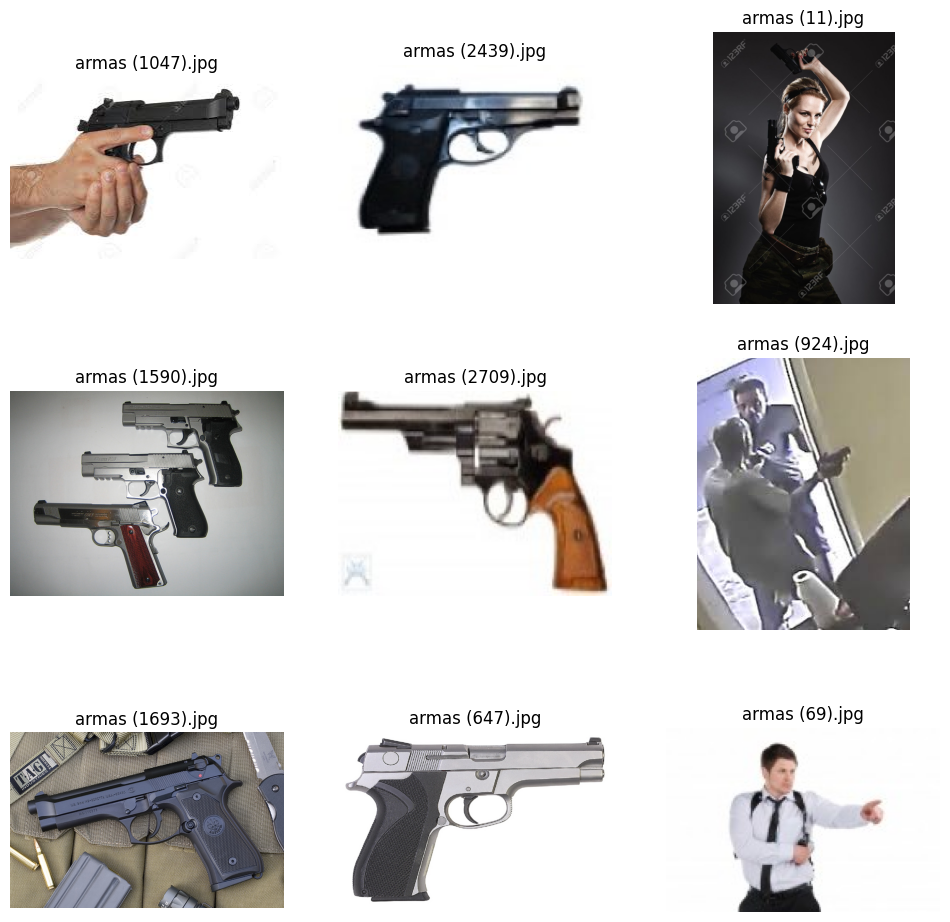

In [3]:
# Paths for the new dataset
images_folder_new = '/kaggle/input/labeled-guns-data-for-object-detection/data/images'  
labels_folder_new = '/kaggle/input/labeled-guns-data-for-object-detection/data/labels'  

# Display Sample Images from the New Dataset

def show_sample_images(images_folder, num_images=9):
    images = os.listdir(images_folder)[:num_images]  
    
    plt.figure(figsize=(12, 12))  # Set the figure size
    for i, img_file in enumerate(images):
        img_path = os.path.join(images_folder, img_file) 
        img = cv2.imread(img_path)  # Read the image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        
        plt.subplot(3, 3, i + 1)  # Create a subplot for each image
        plt.imshow(img)  # Display the image
        plt.title(img_file)  # Set the title as the image file name
        plt.axis('off')  # Hide axis ticks

    plt.show()

# Display the first 9 images from the new training dataset
show_sample_images(images_folder_new, num_images=9)


# <div style="text-align:center; border-radius:15px 15px; padding:10px; color:#E44F1B; margin:0; font-size:120%; font-family:Pacifico; background-color:#1BB0E4; overflow:hidden;"><b> Step 3: Split Data </b> </div>

In [4]:
image_dir = '/kaggle/input/labeled-guns-data-for-object-detection/data/images'
label_dir = '/kaggle/input/labeled-guns-data-for-object-detection/data/labels'

os.makedirs('/kaggle/working/images/train', exist_ok=True)
os.makedirs('/kaggle/working/images/val', exist_ok=True)
os.makedirs('/kaggle/working/labels/train', exist_ok=True)
os.makedirs('/kaggle/working/labels/val', exist_ok=True)

image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

for file in train_files:

    shutil.copy(os.path.join(image_dir, file), '/kaggle/working/images/train/')

    label_file = file.replace('.jpg', '.txt')
    shutil.copy(os.path.join(label_dir, label_file), '/kaggle/working/labels/train/')

    
for file in val_files:
  
    shutil.copy(os.path.join(image_dir, file), '/kaggle/working/images/val/')

    label_file = file.replace('.jpg', '.txt')
    shutil.copy(os.path.join(label_dir, label_file), '/kaggle/working/labels/val/')

print("Data has been split into train and val.")


Data has been split into train and val.


# <div style="text-align:center; border-radius:15px 15px; padding:10px; color:#E44F1B; margin:0; font-size:120%; font-family:Pacifico; background-color:#1BB0E4; overflow:hidden;"><b> Step 4: Create Data YAML File </b> </div>

In [5]:
# Define the content of the YAML file
dataset_config = {
    'path': '/kaggle/working',  
    'names': {0: 'gun'}, 
    'train': 'images/train',  
    'val': 'images/val'  
}

with open('/kaggle/working/data.yaml', 'w') as file:
    yaml.dump(dataset_config, file, default_flow_style=False)

print("data.yaml file has been created.")


data.yaml file has been created.


# <div style="text-align:center; border-radius:15px 15px; padding:10px; color:#E44F1B; margin:0; font-size:120%; font-family:Pacifico; background-color:#1BB0E4; overflow:hidden;"><b> Step 5: Train YOLOv10 Model </b> </div>

In [6]:
import wandb

wandb.init(mode="dryrun")

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Tracking run with wandb version 0.18.1
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


In [7]:

model = YOLO('yolov10b.pt')

model.train(data='/kaggle/working/data.yaml', epochs=30, imgsz=640)


100%|██████████| 39.7M/39.7M [00:00<00:00, 66.9MB/s]


Ultralytics 8.3.4 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov10b.pt, data=/kaggle/working/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 20.4MB/s]
2024-10-03 21:42:44,740	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-03 21:42:45,938	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1
WARNING ⚠️ no model scale passed. Assuming scale='b'.

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  4   1444864  ultralytics.nn.modules.block.C2f             [256, 256, 4, True]           
  5                  -1  1    137728  ultralytics.nn.modules.block.SCDown          [256, 512, 3, 2]              
  6                  -1  4   5773312  ultralytics.nn.modules.block.C2f             [512, 512, 4, True]       

100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/labels/train... 2400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2400/2400 [00:02<00:00, 1088.21it/s]

train: WARNING ⚠️ /kaggle/working/images/train/armas (1125).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /kaggle/working/images/train/armas (1217).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /kaggle/working/images/train/armas (1224).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /kaggle/working/images/train/armas (1759).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /kaggle/working/images/train/armas (2140).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /kaggle/working/images/train/armas (2843).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /kaggle/working/images/train/armas (2902).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /kaggle/working/images/train/armas (2903).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /kaggle/working/images/train/armas (2919).jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /kaggle/working/images/train/armas (583).jpg: corrupt JPEG restored and saved
train: New cache created: /kagg

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/labels/val... 600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:01<00:00, 526.73it/s]

val: WARNING ⚠️ /kaggle/working/images/val/armas (1221).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/images/val/armas (1717).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/images/val/armas (2907).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/images/val/armas (2910).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/images/val/armas (2911).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/images/val/armas (2920).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/images/val/armas (55).jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/images/val/armas (612).jpg: corrupt JPEG restored and saved
val: New cache created: /kaggle/working/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 135 weight(decay=0.0), 148 weight(decay=0.0005), 147 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      11.7G      2.514      4.173      3.254         50        640: 100%|██████████| 150/150 [02:14<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.86it/s]

                   all        600        677     0.0939      0.108     0.0279    0.00663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      11.3G      2.903      3.676      3.548         42        640: 100%|██████████| 150/150 [02:11<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.10it/s]

                   all        600        677      0.163       0.29     0.0874     0.0264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      11.3G      2.677      3.522      3.365         48        640: 100%|██████████| 150/150 [02:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.16it/s]

                   all        600        677      0.553      0.453      0.474      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      11.3G      2.511        3.2      3.195         40        640: 100%|██████████| 150/150 [02:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.09it/s]

                   all        600        677       0.63      0.435      0.492       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      11.3G      2.423      2.985      3.131         53        640: 100%|██████████| 150/150 [02:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.16it/s]

                   all        600        677      0.579       0.48      0.521      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      11.5G        2.3      2.786      3.024         50        640: 100%|██████████| 150/150 [02:09<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.08it/s]

                   all        600        677      0.742      0.509      0.594      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      11.3G      2.249      2.724      2.975         51        640: 100%|██████████| 150/150 [02:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.17it/s]

                   all        600        677      0.745      0.558      0.654      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      11.4G       2.15      2.543      2.888         46        640: 100%|██████████| 150/150 [02:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.09it/s]

                   all        600        677      0.763      0.583      0.675      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      11.3G      2.136      2.507      2.861         41        640: 100%|██████████| 150/150 [02:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.17it/s]

                   all        600        677      0.645      0.575       0.64      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      11.3G      2.082      2.327      2.832         38        640: 100%|██████████| 150/150 [02:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.16it/s]

                   all        600        677        0.7      0.625      0.708      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      11.4G      2.019      2.268       2.78         43        640: 100%|██████████| 150/150 [02:09<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.08it/s]

                   all        600        677      0.788      0.627      0.734       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      11.3G      1.971      2.243      2.744         47        640: 100%|██████████| 150/150 [02:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.16it/s]

                   all        600        677      0.809      0.662      0.773      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      11.3G      1.909      2.125      2.698         47        640: 100%|██████████| 150/150 [02:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.16it/s]

                   all        600        677      0.798      0.683      0.782      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      11.3G       1.93      2.104      2.696         50        640: 100%|██████████| 150/150 [02:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.17it/s]

                   all        600        677       0.76      0.688      0.776      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      11.3G      1.863      2.035      2.654         40        640: 100%|██████████| 150/150 [02:09<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.18it/s]

                   all        600        677        0.8      0.703      0.798      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      11.3G      1.857      1.987       2.64         55        640: 100%|██████████| 150/150 [02:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.07it/s]

                   all        600        677      0.843      0.699      0.808       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      11.3G      1.803       1.91      2.617         31        640: 100%|██████████| 150/150 [02:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.09it/s]

                   all        600        677      0.811      0.712      0.803      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      11.3G      1.783      1.911        2.6         42        640: 100%|██████████| 150/150 [02:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.16it/s]

                   all        600        677      0.816      0.732      0.825       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      11.3G      1.759      1.833      2.579         45        640: 100%|██████████| 150/150 [02:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.16it/s]

                   all        600        677      0.856      0.691      0.812      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      11.3G      1.705      1.774      2.546         46        640: 100%|██████████| 150/150 [02:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.15it/s]

                   all        600        677      0.831      0.742      0.833      0.626


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      11.3G      1.674      1.634      2.565         16        640: 100%|██████████| 150/150 [02:11<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.15it/s]

                   all        600        677      0.859      0.684      0.814      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      11.3G      1.653      1.573      2.543         16        640: 100%|██████████| 150/150 [02:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.17it/s]

                   all        600        677      0.866      0.682      0.817      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      11.3G      1.613      1.503      2.506         21        640: 100%|██████████| 150/150 [02:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.17it/s]

                   all        600        677      0.811      0.758      0.845      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      11.3G      1.556      1.427      2.477         16        640: 100%|██████████| 150/150 [02:09<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.17it/s]

                   all        600        677      0.879      0.741      0.853      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      11.3G      1.506      1.338      2.403         26        640: 100%|██████████| 150/150 [02:09<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.18it/s]

                   all        600        677      0.905      0.718      0.851       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      11.3G      1.477      1.263      2.401         18        640: 100%|██████████| 150/150 [02:09<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.18it/s]

                   all        600        677      0.847      0.761      0.857      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      11.3G      1.429      1.193      2.346         27        640: 100%|██████████| 150/150 [02:09<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.17it/s]

                   all        600        677       0.88      0.762      0.864      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      11.3G      1.409      1.154      2.335         17        640: 100%|██████████| 150/150 [02:09<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.18it/s]

                   all        600        677      0.888      0.767      0.872      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      11.3G      1.363      1.102      2.315         20        640: 100%|██████████| 150/150 [02:09<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.18it/s]

                   all        600        677      0.897      0.768       0.88       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      11.3G      1.342      1.051      2.284         17        640: 100%|██████████| 150/150 [02:09<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.18it/s]

                   all        600        677      0.882      0.786      0.881      0.714



30 epochs completed in 1.183 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 41.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 41.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.4 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv10b summary (fused): 383 layers, 20,412,694 parameters, 0 gradients, 97.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.17it/s]


                   all        600        677      0.882      0.786      0.881      0.714
Speed: 0.1ms preprocess, 11.6ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃▆██▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
wandb:                  lr/pg1 ▃▆██▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
wandb:                  lr/pg2 ▃▆██▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
wandb:        metrics/mAP50(B) ▁▁▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇█▇█▇▇████████
wandb:     metrics/mAP50-95(B) ▁▁▄▄▄▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇████████
wandb:    metrics/precision(B) ▁▂▅▆▅▇▇▇▆▆▇▇▇▇▇▇▇▇█▇██▇██▇████
wandb:       metrics/recall(B) ▁▃▅▄▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇█▇▇██▇█████
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss ▆█▇▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
wandb:          train/cls_loss █▇▇▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁
wandb:          train/dfl_loss ▆█▇▆▆▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▃▂▂▂▂▂▁▁▁▁
wandb:            val/box_loss █▇▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁
wandb:            val/cls_loss █▅▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:            val/dfl_loss █▆▄▃▃▂▂▂▂▂▂

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7874ce37c9d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# <div style="text-align:center; border-radius:15px 15px; padding:10px; color:#E44F1B; margin:0; font-size:120%; font-family:Pacifico; background-color:#1BB0E4; overflow:hidden;"><b> Step 6: Make Predictions & Show 9 Images </b> </div>


0: 640x640 1 gun, 16.3ms
1: 640x640 1 gun, 16.3ms
2: 640x640 1 gun, 16.3ms
3: 640x640 1 gun, 16.3ms
4: 640x640 4 guns, 16.3ms
5: 640x640 1 gun, 16.3ms
6: 640x640 1 gun, 16.3ms
7: 640x640 1 gun, 16.3ms
8: 640x640 1 gun, 16.3ms
Speed: 3.0ms preprocess, 16.3ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


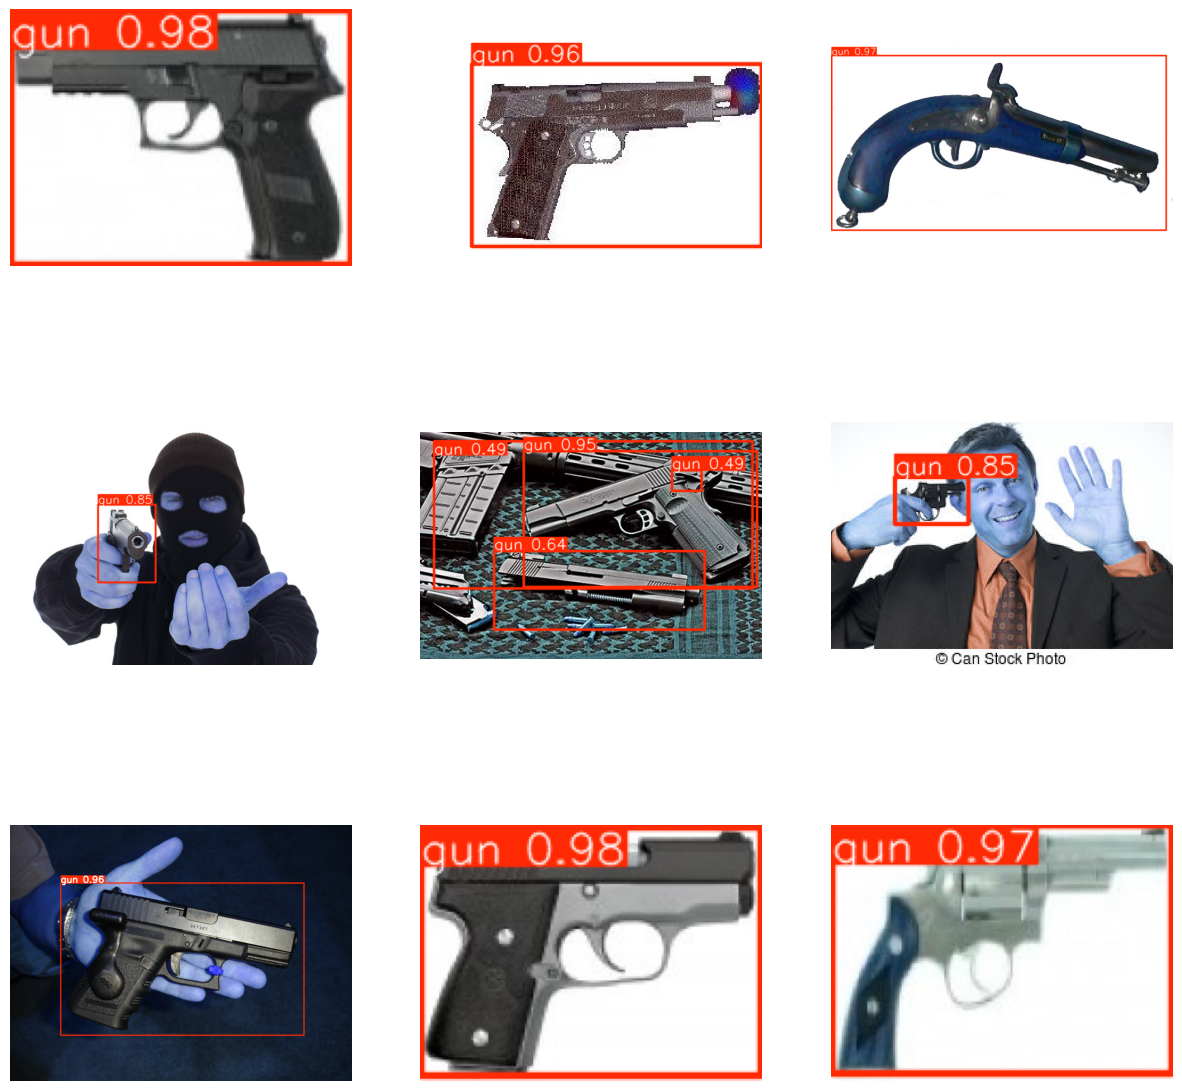

In [8]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

test_images_dir = '/kaggle/working/images/val'
test_images = glob.glob(test_images_dir + '/*.jpg')

random_images = random.sample(test_images, 9)

results = model(random_images, imgsz=640)

plt.figure(figsize=(15, 15))

for i, result in enumerate(results[:9]):
    
    img = cv2.imread(random_images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    
    annotated_img = result.plot()  
    
    plt.subplot(3, 3, i+1)
    plt.imshow(annotated_img)
    plt.axis('off')

plt.show()


# <div style="text-align:center; border-radius:15px 15px; padding:10px; color:#E44F1B; margin:0; font-size:120%; font-family:Pacifico; background-color:#1BB0E4; overflow:hidden;"> Step 7: Save Model </div>

In [9]:
model.save('Guns_detection_model.pt')